In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing  import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

PassengerId : ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet : ['Europa' 'Earth' 'Mars' nan]
CryoSleep : [False True nan]
Cabin : ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Age : [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
VIP : [False True nan]
RoomService : [   0.  109.   43. ... 1569. 8586.  745.]
FoodCourt : [   0.    9. 3576. ... 3208. 6819. 4688.]
ShoppingMall : [   0.   25.  371. ... 1085.  510. 1872.]
Spa : [   0.  549. 6715. ... 2868. 1107. 1643.]
VRDeck : [   0.   44.   49. ... 1164.  971. 3235.]
Name : ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hont

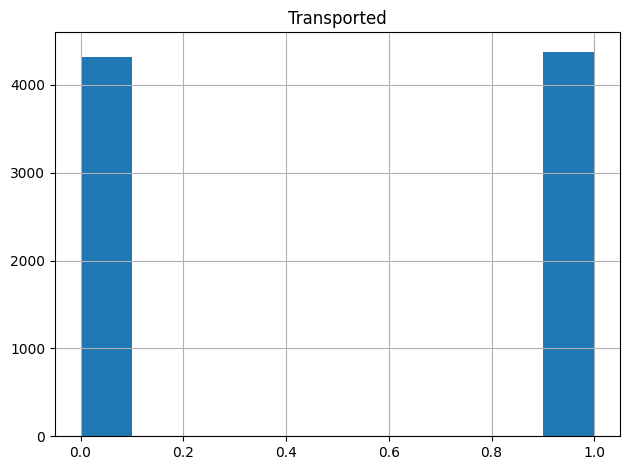

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64


In [3]:
for i in train.columns.tolist():
  print(i, ":", train[i].unique())

print(train.shape)

train['Transported'] = train['Transported'].map({True: 1, False: 0}).astype(int)
train[["Transported"]].hist()
plt.tight_layout()
plt.show()

print(train["Transported"])

In [4]:
x_train = train.drop(columns=["Transported"])
y_train = train["Transported"]

In [5]:
x_train = x_train.drop(columns=["Name"])
test = test.drop(columns=["Name"])

In [6]:
x_train.isna().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [7]:
for i in x_train.columns.tolist():
  print(i, ":", x_train[i].unique(), len(x_train[i].unique()))

PassengerId : ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02'] 8693
HomePlanet : ['Europa' 'Earth' 'Mars' nan] 4
CryoSleep : [False True nan] 3
Cabin : ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S'] 6561
Destination : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan] 4
Age : [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.] 81
VIP : [False True nan] 3
RoomService : [   0.  109.   43. ... 1569. 8586.  745.] 1274
FoodCourt : [   0.    9. 3576. ... 3208. 6819. 4688.] 1508
ShoppingMall : [   0.   25.  371. ... 1085.  510. 1872.] 1116
Spa : [   0.  549. 6715. ... 2868. 1107. 1643.] 1328
VRDeck : [   0.   44.   49. ... 1164.  971. 3235.] 1307


In [8]:
selected_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']  # Chỉ check những cột này
correlation = train[selected_features + ['Transported']].corr()['Transported'].abs().drop('Transported')

print(correlation)

RoomService     0.244611
FoodCourt       0.046566
ShoppingMall    0.010141
Spa             0.221131
VRDeck          0.207075
Age             0.075026
Name: Transported, dtype: float64


In [9]:
import numpy as np
import scipy.stats as stats

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cramers_value = cramers_v(train['Name'], train['Transported'])
print("Cramér’s V:", cramers_value)


Cramér’s V: 0.9989396869787213


In [10]:
x_train['PassengerId'] = x_train['PassengerId'].str[-1:]
print(x_train["PassengerId"].unique())

['1' '2' '3' '4' '5' '6' '7' '8']


In [11]:
x_train['Cabin'] = x_train['Cabin'].str[-1:]
print(x_train["Cabin"].unique())

['P' 'S' nan]


In [12]:
store = test['PassengerId']
test['PassengerId'] = test['PassengerId'].str[-1:]
test['Cabin'] = test['Cabin'].str[-1:]

In [13]:
nums_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler())
])

nom_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('nums', nums_transformer, ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]),
    ('nom', nom_transformer, ["PassengerId", "HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"])
])

x_train = preprocessor.fit_transform(x_train)
x_train

array([[ 0.70943692, -0.34058987, -0.28731404, ...,  1.        ,
         1.        ,  0.        ],
       [-0.33671733, -0.1753636 , -0.28166908, ...,  1.        ,
         1.        ,  0.        ],
       [ 2.03456565, -0.27540886,  1.95561575, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.1972301 , -0.34058987, -0.28731404, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.2212316 , -0.34058987,  0.37063712, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.05815501, -0.14959437,  2.65308161, ...,  1.        ,
         1.        ,  0.        ]])

In [14]:
feature_names = preprocessor.get_feature_names_out()
print(feature_names)
import pandas as pd

train_processed_df = pd.DataFrame(x_train, columns=feature_names)
print(train_processed_df.head())


['nums__Age' 'nums__RoomService' 'nums__FoodCourt' 'nums__ShoppingMall'
 'nums__Spa' 'nums__VRDeck' 'nom__PassengerId_1' 'nom__PassengerId_2'
 'nom__PassengerId_3' 'nom__PassengerId_4' 'nom__PassengerId_5'
 'nom__PassengerId_6' 'nom__PassengerId_7' 'nom__PassengerId_8'
 'nom__HomePlanet_Earth' 'nom__HomePlanet_Europa' 'nom__HomePlanet_Mars'
 'nom__CryoSleep_False' 'nom__CryoSleep_True' 'nom__Cabin_P'
 'nom__Cabin_S' 'nom__Destination_55 Cancri e'
 'nom__Destination_PSO J318.5-22' 'nom__Destination_TRAPPIST-1e'
 'nom__VIP_False' 'nom__VIP_True']
   nums__Age  nums__RoomService  nums__FoodCourt  nums__ShoppingMall  \
0   0.709437          -0.340590        -0.287314           -0.290817   
1  -0.336717          -0.175364        -0.281669           -0.248968   
2   2.034566          -0.275409         1.955616           -0.290817   
3   0.290975          -0.340590         0.517406            0.330225   
4  -0.894666           0.118709        -0.243409           -0.038048   

   nums__Spa  nu

In [15]:
train_processed_df.isna().sum()

,0
nums__Age,0
nums__RoomService,0
nums__FoodCourt,0
nums__ShoppingMall,0
nums__Spa,0
nums__VRDeck,0
nom__PassengerId_1,0
nom__PassengerId_2,0
nom__PassengerId_3,0
nom__PassengerId_4,0


In [16]:
#selector = SelectKBest(score_func=mutual_info_classif, k=25)
#x_train = selector.fit_transform(x_train, y_train)

In [17]:
#test = preprocessor.transform(test)
#test = selector.transform(test)

In [18]:
model = model = SVC(C=1.0, kernel='rbf', gamma='scale', probability=True)
model.fit(x_train, y_train)

SVC(probability=True)

In [19]:
test = preprocessor.transform(test)
result = model.predict(test)
result

array([1, 0, 1, ..., 1, 1, 1])

In [20]:
store = pd.DataFrame(store)

In [21]:
store['Transported'] = result

In [22]:
store

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
...,...,...
4272,9266_02,1
4273,9269_01,1
4274,9271_01,1
4275,9273_01,1


In [23]:
store['Transported'] = store['Transported'].map({1: True, 0: False}).astype(bool)
store.to_csv("submission.csv", index=False)
store

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True
